In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telecom_df=pd.read_csv("Telecom Customers Churn.csv")
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telecom_df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
telecom_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [8]:
telecom_df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
telecom_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
telecom_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
telecom_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
telecom_df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [13]:
telecom_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [20]:
telecom_df_required=telecom_df.drop("SeniorCitizen",axis=1)
telecom_df_required

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


C:\Users\Vishnu Kumar Mantri\AppData\Local\Temp\ipykernel_10768\1792293693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telecom_df_required.corr())


<Axes: >

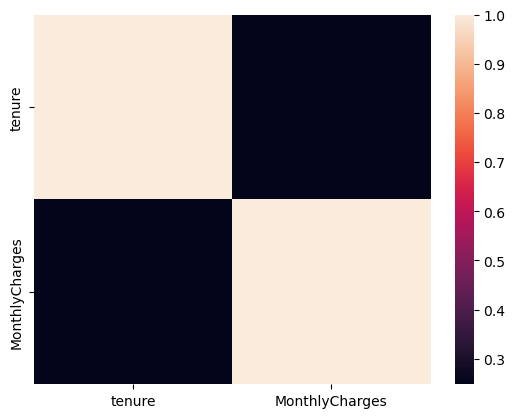

In [21]:
sns.heatmap(telecom_df_required.corr())

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

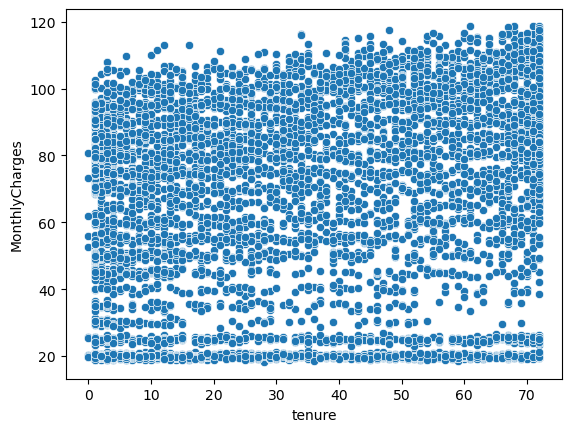

In [25]:
sns.scatterplot(x=telecom_df_required['tenure'],y=telecom_df_required['MonthlyCharges'])

<Axes: xlabel='tenure', ylabel='TotalCharges'>

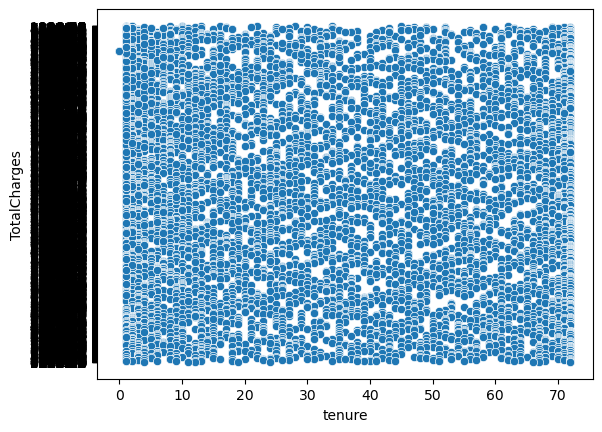

In [26]:
sns.scatterplot(x=telecom_df_required['tenure'],y=telecom_df_required['TotalCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

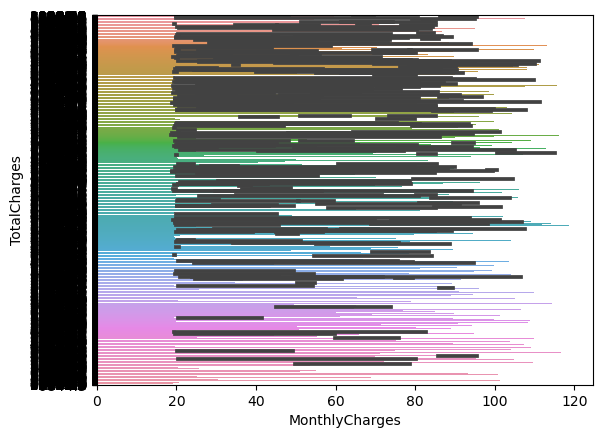

In [28]:
sns.barplot(x=telecom_df_required['MonthlyCharges'],y=telecom_df_required['TotalCharges'])

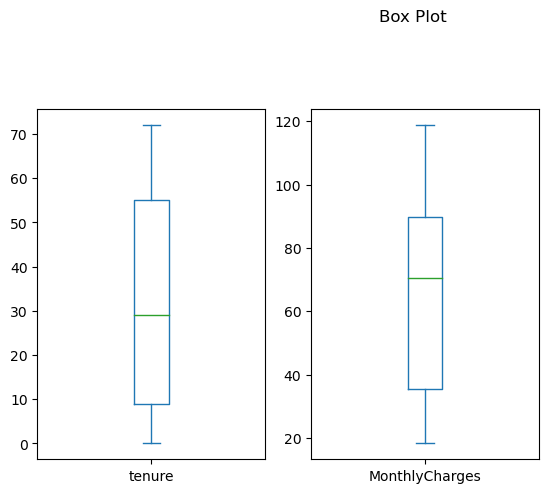

In [31]:
telecom_df_required.plot(kind='box', subplots=True,layout=(2,3), figsize=(10,10), 
                                        title='Box Plot')
plt.savefig('telecom_boxplot')
plt.show()

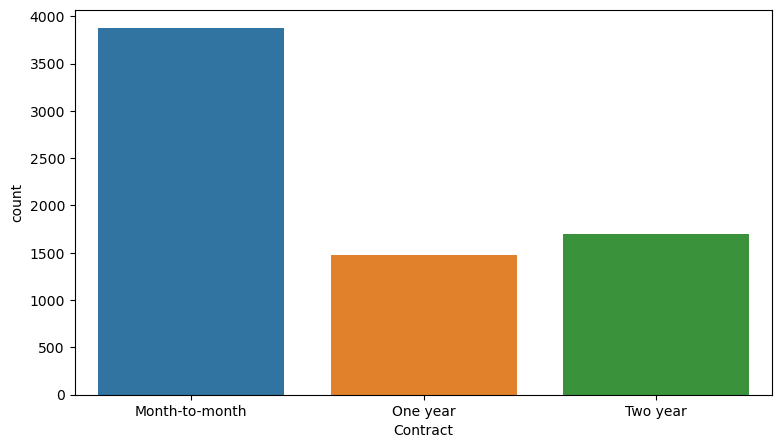

In [33]:
plt.figure(figsize=(9,5))
sns.countplot(x = telecom_df_required.Contract)
plt.show()

<Figure size 900x500 with 0 Axes>

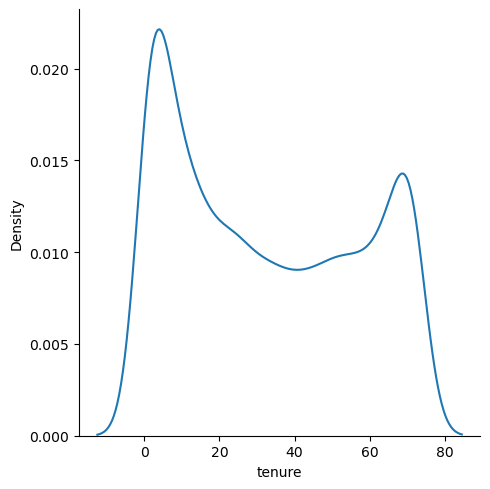

In [35]:
plt.figure(figsize = (9,5))
sns.displot(telecom_df_required.tenure,kind='kde')
plt.show()

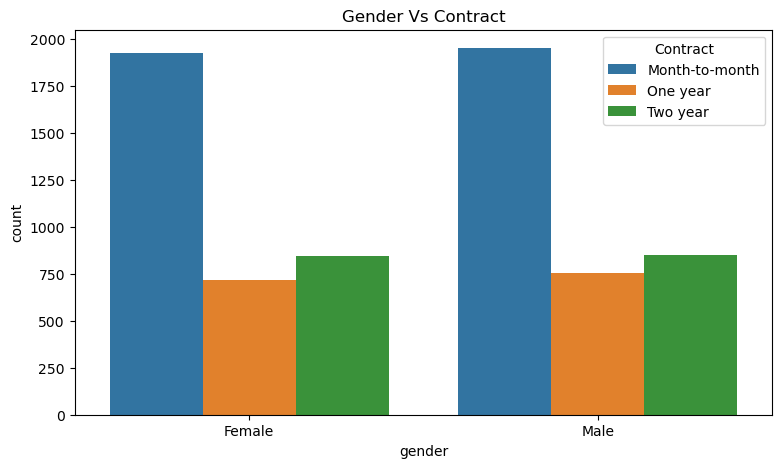

In [37]:
plt.figure(figsize = (9,5))
sns.countplot(x = "gender",hue = "Contract",data = telecom_df_required)
plt.title("Gender Vs Contract")
plt.show()

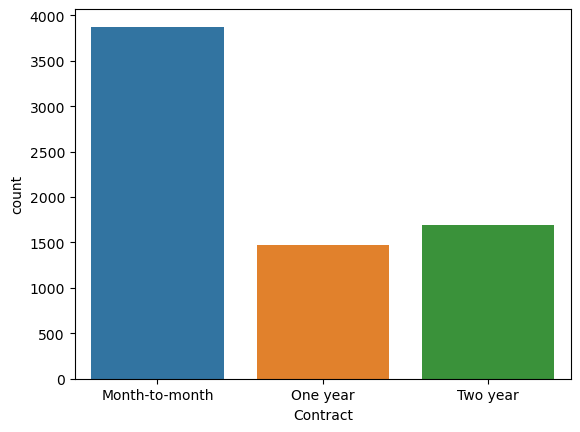

In [38]:
sns.countplot(x=telecom_df_required['Contract'],label="Count")
plt.show()